## Titanic Survival Dataset; Machine Learning

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [23]:
#Reading the data
df = pd.read_csv('titanic_train.csv')

## Data Wrangling

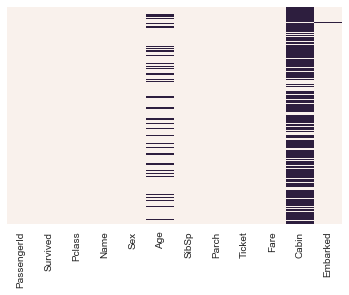

In [24]:
#Visualizing the missing values
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [25]:
#Creating a function to impute the missing values
def impute(cols):
    Age = cols[0] 
    Pclass = cols[1] 
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 38
        if Pclass == 2:
            return 30
        if Pclass == 3:
            return 25
    else:
        return Age

In [26]:
df['Age'] = df[['Age','Pclass']].apply(impute, axis = 1)

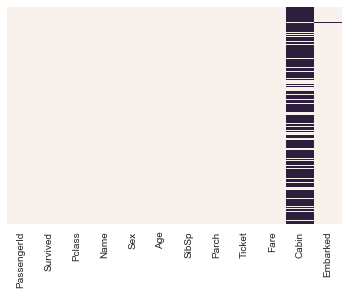

In [27]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [28]:
df.drop('Cabin',inplace =True, axis =1)

In [29]:
df.dropna(inplace = True)

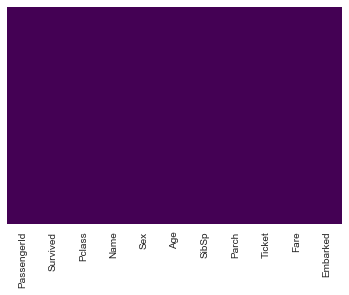

In [30]:
sns.heatmap(df.isnull(), yticklabels= False, cbar=False, cmap = 'viridis')

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
logit = LogisticRegression

In [33]:
df.count()['Name']

889

## Modelling

In [34]:
from sklearn.model_selection import train_test_split

In [36]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Creating dummy varaibles for categorical data

In [37]:
sex = pd.get_dummies(df['Sex'], drop_first=True)
Pclass = pd.get_dummies(df['Pclass'], drop_first=True)
embark = pd.get_dummies(df['Embarked'], drop_first=True)
df.drop(['Sex', 'Embarked', 'Pclass', 'Name', 'Ticket'], axis =1, inplace=True)
df = pd.concat([df, sex, embark, Pclass], axis =1)
df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,1,0,22.0,1,0,7.2500,1,0,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,0,1
3,4,1,35.0,1,0,53.1000,0,0,1,0,0
4,5,0,35.0,0,0,8.0500,1,0,1,0,1


In [38]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [53]:
X_train.count()

PassengerId    622
Age            622
SibSp          622
Parch          622
Fare           622
male           622
Q              622
S              622
2              622
3              622
dtype: int64

### Working with Logistic Regression 

In [41]:
logit = LogisticRegression()
logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
pred = logit.predict(X_test)

In [46]:
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.82      0.93      0.87       163
          1       0.85      0.67      0.75       104

avg / total       0.83      0.83      0.82       267



Logistic Regression gives 83% precision

### Working with KNN Classifier

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
knn = KNeighborsClassifier(n_neighbors=1)

In [56]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [57]:
pred_knn = knn.predict(X_test)

In [58]:
print(classification_report(y_test, pred_knn))

             precision    recall  f1-score   support

          0       0.65      0.67      0.66       163
          1       0.45      0.43      0.44       104

avg / total       0.57      0.58      0.57       267



In [59]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

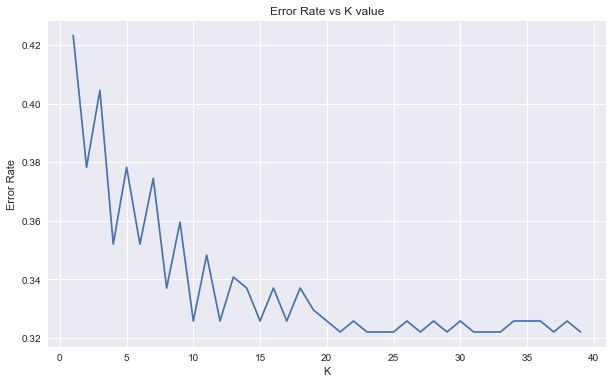

In [60]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate)
plt.title('Error Rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Using k=21

In [64]:
knn2 = KNeighborsClassifier(n_neighbors=21)

In [65]:
knn2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=21, p=2,
           weights='uniform')

In [66]:
pred_knn2 = knn.predict(X_test)

In [67]:
print(classification_report(y_test, pred_knn2))

             precision    recall  f1-score   support

          0       0.66      0.98      0.79       163
          1       0.85      0.21      0.34       104

avg / total       0.73      0.68      0.61       267



Thus the best precision with knn with k_value = 21 is 73%. However, Logistic Regression gives an accuracy of 83%. 